In [16]:
import pandas as pd
import numpy as np
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

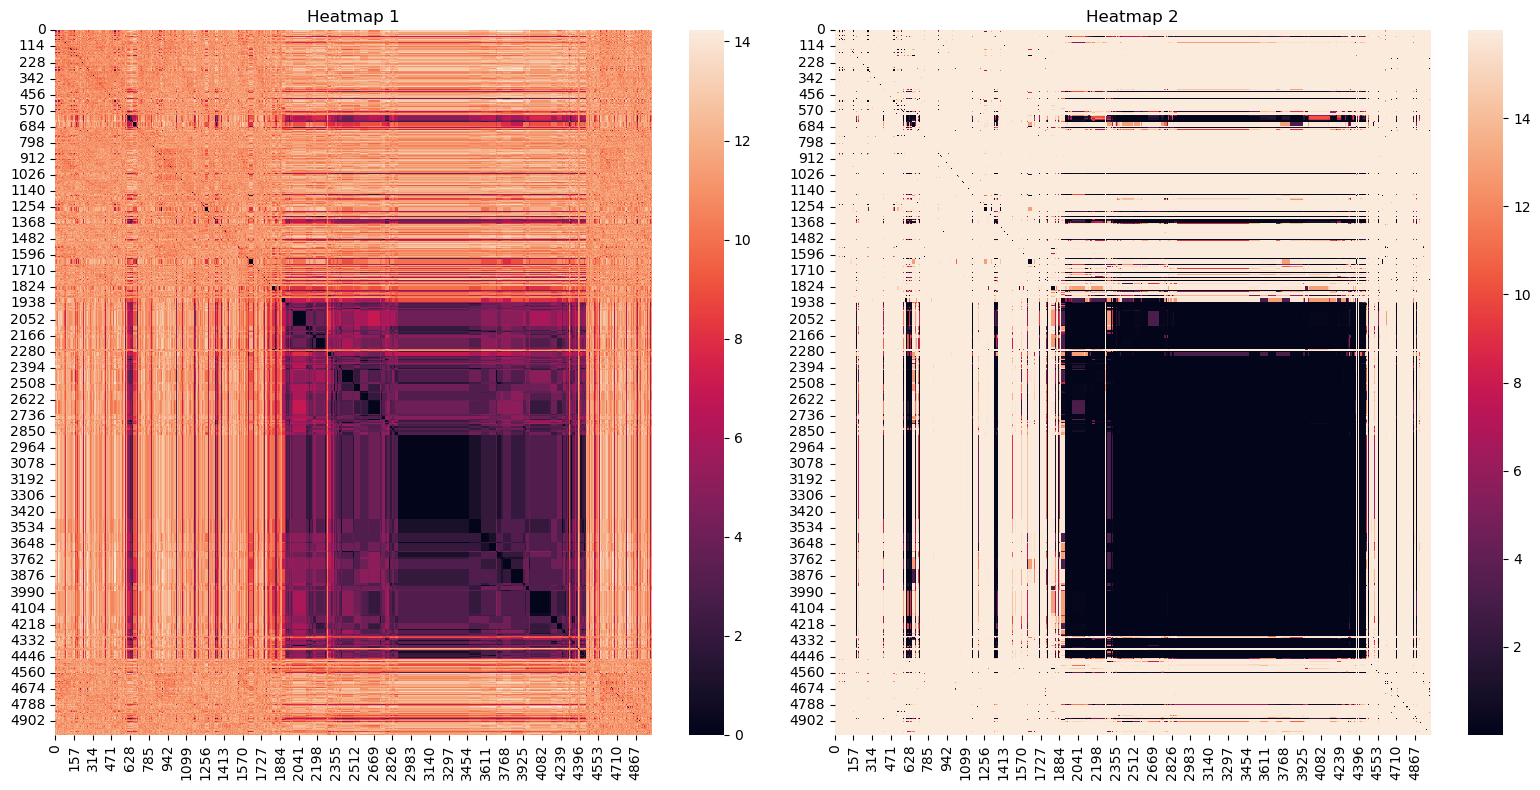

In [17]:
# %matplotlib inline

# Read the initial pairwise distance matrix
df1 = pd.read_csv("./pairwise_distances.csv", header=None).values

# Read the smoothed pairwise distance matrix
df2 = pd.read_csv("./smoothed_pairwise_distances.csv", header=None).values

fig, axes = plt.subplots(1, 2, figsize=(16, 8))


sns.heatmap(df1, ax=axes[0])
axes[0].set_title("Heatmap 1")


sns.heatmap(df2, ax=axes[1])
axes[1].set_title("Heatmap 2")

plt.tight_layout()

plt.savefig("fig1_b.png", dpi=600, bbox_inches='tight')
plt.show()
plt.close()   #

G:\anaconda3\envs\kmap_demo\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
G:\anaconda3\envs\kmap_demo\lib\site-packages\umap\umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
G:\anaconda3\envs\kmap_demo\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP embedding shape: (5000, 2)


G:\anaconda3\envs\kmap_demo\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE embedding shape: (5000, 2)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7464\1742403130.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  default_colors = plt.cm.get_cmap('tab10', len(unique_labels)).colors  # Use the tab10 colormap


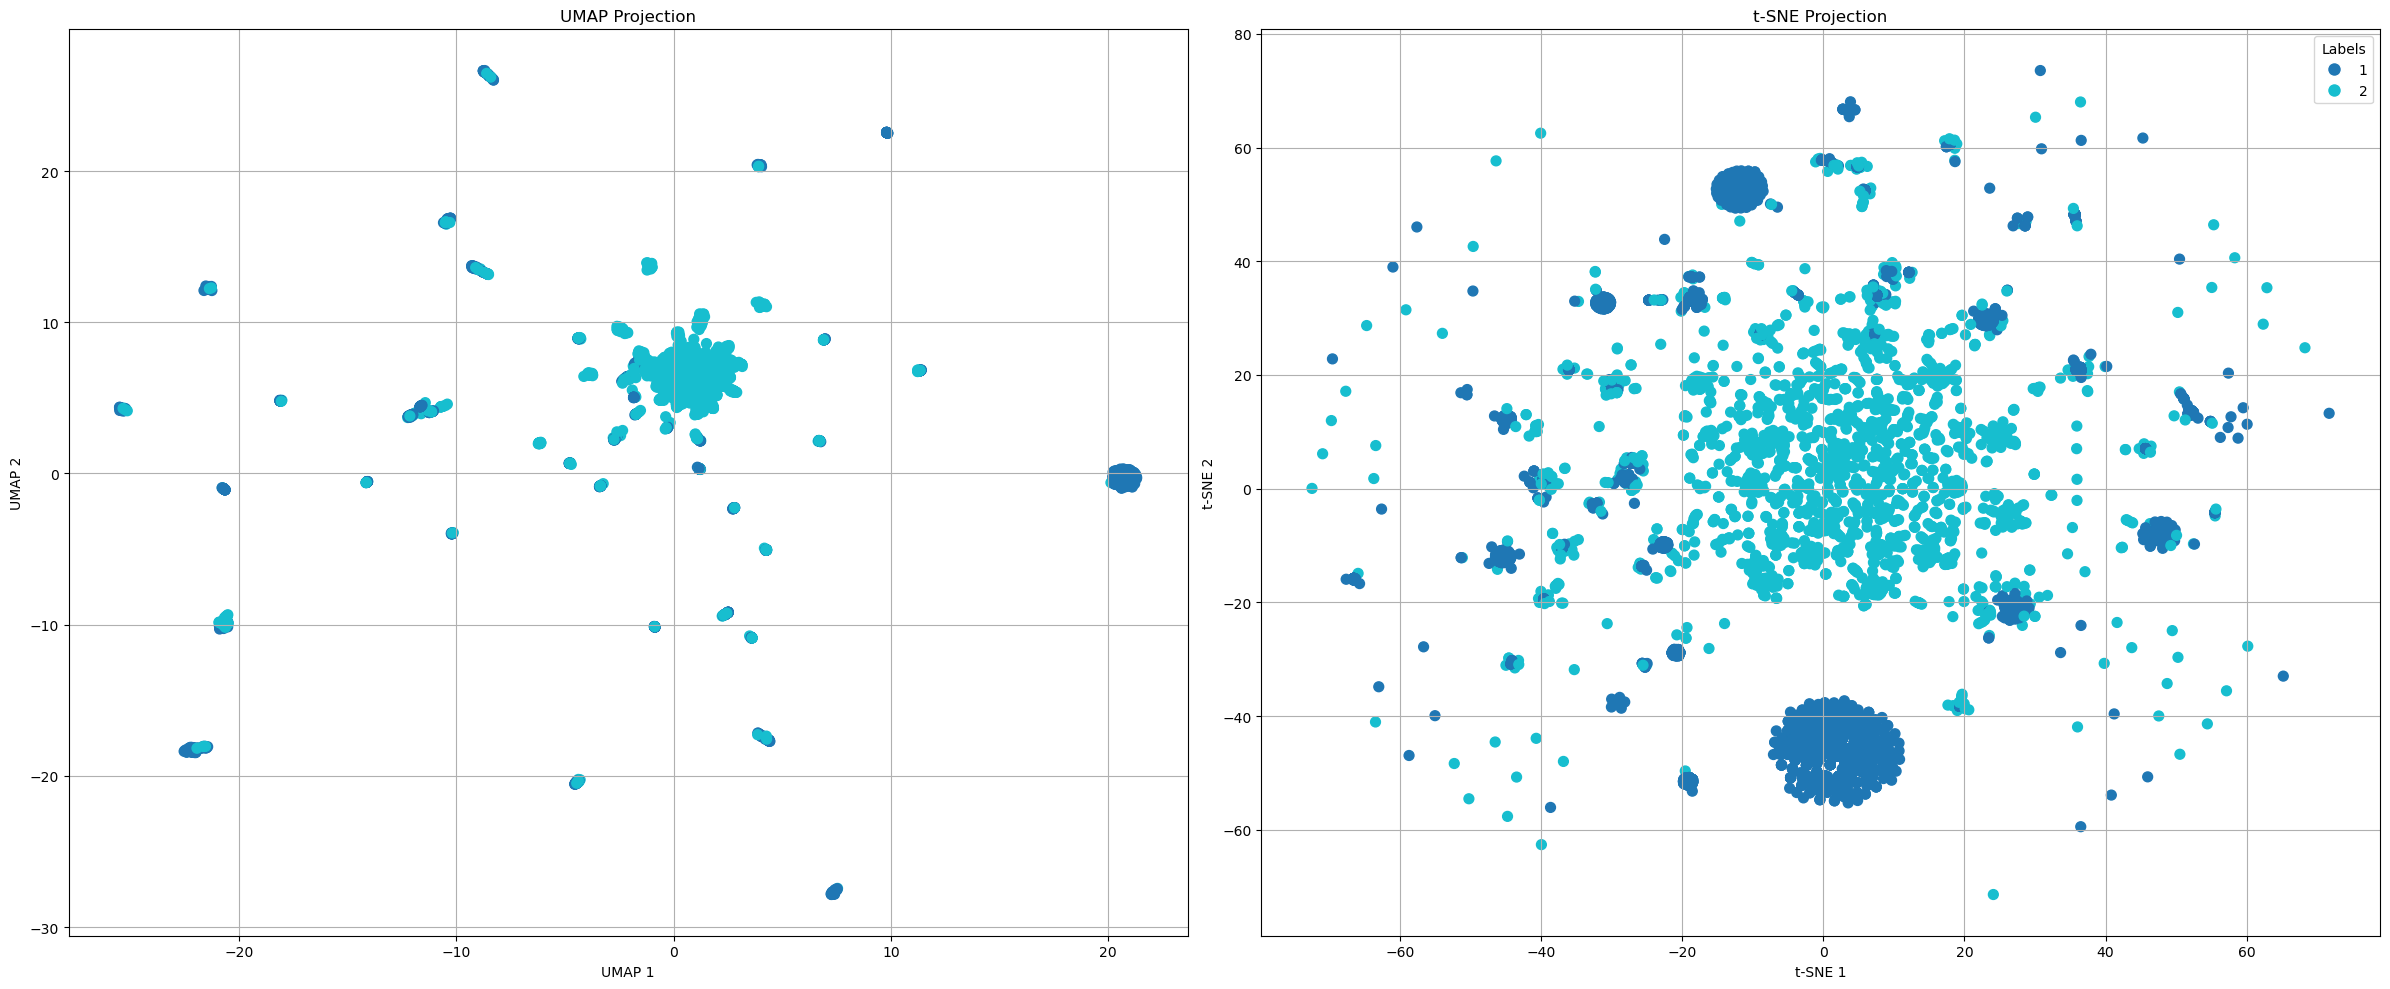

In [18]:

# %matplotlib inline

# 1. Read the CSV file and build the distance matrix
csv_file = 'smoothed_pairwise_distances.csv'
distance_df = pd.read_csv(csv_file, header=None)

# Convert to a NumPy array
distance_matrix = distance_df.values


labels_df = pd.read_csv('sample_labels.csv', header=None)
labels = labels_df.iloc[:, 0].tolist()

# label 0 represents the motif k-mers and label 1 represents the random k-mers
label_encoder = LabelEncoder()
label_numeric = label_encoder.fit_transform(labels)

# 2. Apply UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=2, metric='precomputed', random_state=42)
umap_embedding = umap_reducer.fit_transform(distance_matrix)
print("UMAP embedding shape:", umap_embedding.shape)

# 3. Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, metric='precomputed', random_state=42, perplexity=30, n_iter=1000, init="random")
tsne_embedding = tsne.fit_transform(distance_matrix)
print("t-SNE embedding shape:", tsne_embedding.shape)

# 4. Visualization
fig, axes = plt.subplots(1, 2, figsize=(24, 10))


unique_labels = np.unique(label_numeric)
default_colors = plt.cm.get_cmap('tab10', len(unique_labels)).colors  # Use the tab10 colormap
cmap = ListedColormap(default_colors)


axes[0].scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=50, c=label_numeric, cmap=cmap)
legend_labels = label_encoder.classes_
axes[0].set_title('UMAP Projection')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')
axes[0].grid(True)


axes[1].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], s=50, c=label_numeric, cmap=cmap)
axes[1].set_title('t-SNE Projection')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True)


legend_patches = [
    plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=cmap(i))
    for i in range(len(legend_labels))
]
axes[1].legend(legend_patches, legend_labels, title="Labels", loc='best')

plt.tight_layout()
plt.show();  #
plt.close()   #
